<a href="https://colab.research.google.com/github/ankanasamanta12/ML-Data-Cleaning-and-Feature-Selection/blob/main/ML_Data_Cleaning_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science Engineering Methods and Tools**
### **Assignment 1 : ML Data Cleaning and Feature Selection**

**Name - Ankana Asit Baran Samanta**

**NUID - 001007431**

## **Abstract**

House Sales prediction is based on various different parameters. The following notebook aims to analyse a housing sales dataset, inspecting the data set for any missing data and finding the range and distribution of different columns in the dataset. It also aims to find the dependency between the variables. After the analysis and normalization of the data, we aim to find most significant features that would be important in order to predict the house prices accurately.



## **1. Importing necessary libraries**

In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the python libraries that would required to execute various functions.



## **2. Data Loading**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ankanasamanta12/ML-Data-Cleaning-and-Feature-Selection/main/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


The dataset for house sales in King county is loaded, it is a Linear Regression based dataset from Kaggle

## **3. Descriptive Statistics**

In [ ]:
df.shape

(21613, 21)

The dataset consists of 21613 tuples and 21 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The .info() function denotes the overall summary of the dataset.


*   The data types supported are float, int and object
*   All the columns support not null values
*   The memory used by the dataset is also denoted by this function




In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The describe() function quantitatively describes the main features of the data. It summarizes the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


*   The function gives the Range of the data by substracting Max-Min in every column, mean and standard deviation
*   It shows all the quartiles Q1(25th Percentile), Q2(50th Percentile, Median) and Q3(75th Percentile) of the data set.




# **4. Data Preprocessing**

**4.1 Checking the data set for any missing data**

In [ ]:
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The is.null() function is to check if there are any null or missing values present in the data set. It is seen that there is no missing data in the data set.

**4.2 Dropping columns for a better prediction model**

Using unique function to find the unique values in the features

In [ ]:
df.id.unique()

array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157])

The id column is unique id number stating the order id of the house sale.

In [ ]:
df.date.unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

The above code shows the unique values for the date column, which specifies which date the order was made.

In [ ]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

This represents the unique zip codes present in the zipcode feature

In [ ]:
df.drop(['id','date', 'zipcode'], axis = 1,inplace=True)

The above code is to drop the columns for the following reasons:
1. 'id' field is a unique set of ids which states the order id for the house purchase. 
2. 'date' column is an object column which states the order date.
3.  'zipcode' is a categorical column which has a lot of unique values.The categorization with respect to the target variable for a massive amount of zipcodes is not possible. The model is better with fewer dummy variables as the model coefficient will get complex with many dummy variables


**4.3 Categorizing the yr_renovated Column**

In [ ]:
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

The above column 'yr_renovated' shows the years in which the houses have been renovated. This column denotes a 0 if a renovation has not taken place and the year if the renovation has taken place.

In [ ]:
# Making the yr_renovated column to a categorical column
df.loc[df.yr_renovated != 0, ['yr_renovated']] = 1
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


The above code converts the yr_renovated into a categorical column. 
  

*   The .loc function of pandas sets the values as 0 and 1 for the entire column using a callable condition.
*   Whenever the column sees a year value it replaces the year as '1'
*   0 denotes the house wasn't renovated, 1 denotes the house was renovated
*   The column has been made categorical as it will be easy for the model to calculate on the basis of 0 and 1.
 

**4.4 Normalizing the data**

In [ ]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'view','condition','grade','sqft_above','sqft_basement','yr_built','lat','long',
        'sqft_living15','sqft_lot15']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'view','condition','grade','sqft_above','sqft_basement','yr_built','lat','long',
        'sqft_living15','sqft_lot15']] = pd.DataFrame(x_scaled)

In [ ]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,1,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0,0.741354,0.393688,0.241094,0.007871


Normalization is rescaling the data in every column to a column range that is [0,1] so that the features are consistent with each other and it is easier for the model to predict given a common range of all the features.

*   The MinMaxScaler method has been used for normalizing the data.
*   This method scales all the data in the [0,1] range , and [-1,1] if there are negative values in the dataset

*   The Feature scaling is done so that different numerical values fall in the similar range for the ML model to perform better and have optimal models. If the columns are in different scales it might not be able to predict the model accurately.

## **5. Exploratory Data Analysis**

**Pearson's Correlation Coefficient using heatmap**

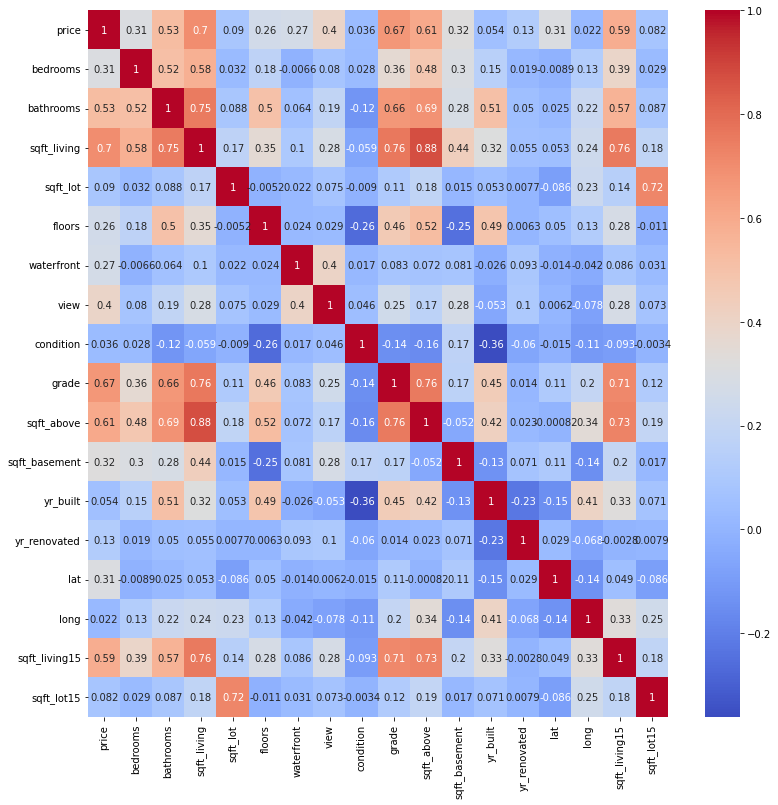

In [ ]:
#Plotting heatmap for the correlation
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

The above code is to plot a heatmap

*   It depicts the correlation of all the variables against the other variables to show the dependency between them
*   The Pearson's correlation of every variable against the other variable is represented by a color which indicates it has a strong correlation or a weak correlation
*   The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation
*   If we observe in the above graph with respect to Price, features like sqft_living,grade and sqft_above have a strong correlation as the values are closer to 1
*   Some of the features have a strong correlation with each other like Bathrooms with sqft_living. It is observed from the heatmap that the features do have dependency




**Pairwise Relation between variables**

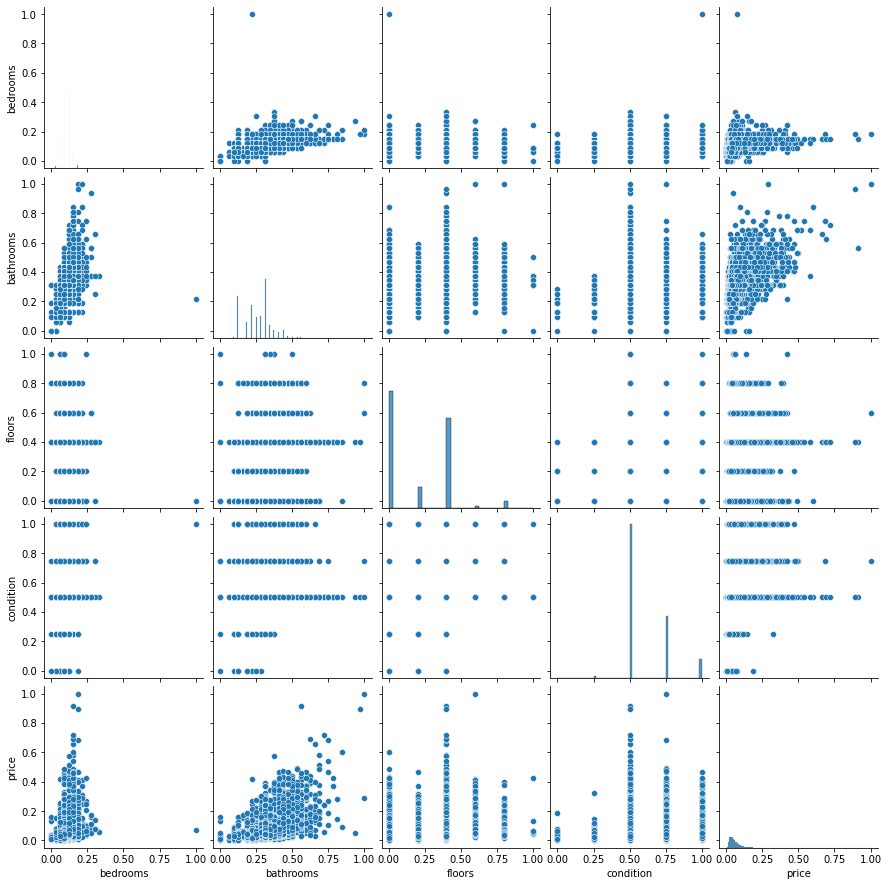

In [ ]:
#Plotting the pairplot
sns.pairplot(df, vars=['bedrooms','bathrooms','floors','condition','price'])

The above code shows the pairplot for certain number of columns.


*   It lets us see the distribution of the variables with relation to the other variables
*   Here only a limited columns have been plotted in the above scatterplot for better performance
*   The bathrooms vs price has a positive correlation, it means that more the number of bathrooms , the higher is the price of the apartment



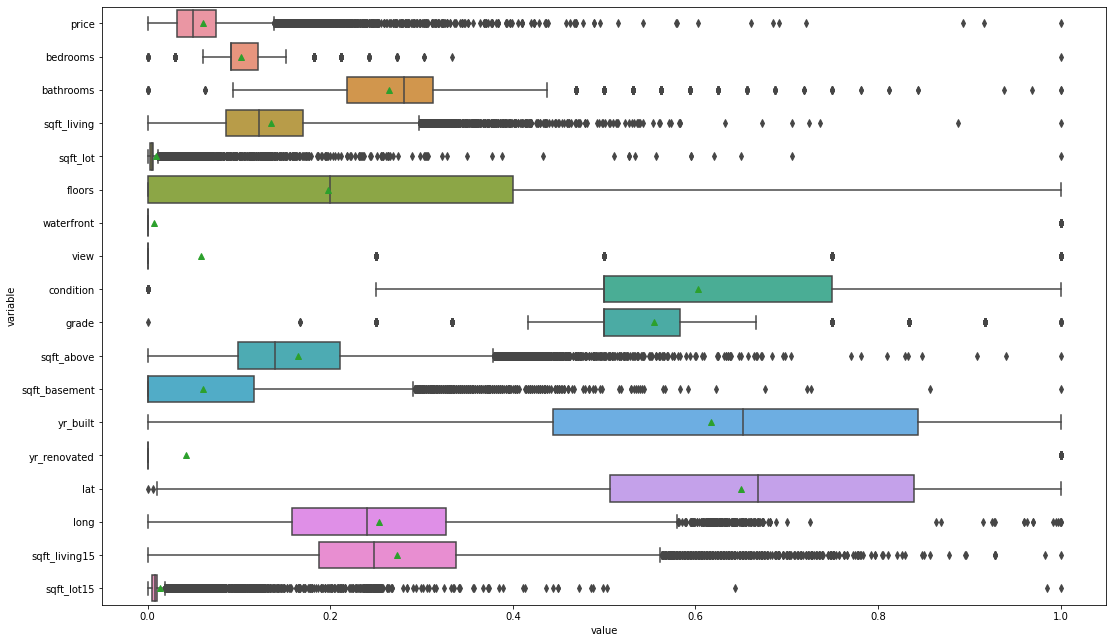

In [ ]:
plt.figure(figsize=(18,11))
sns.boxplot(x="value", y="variable", data=pd.melt(df),showmeans=True,orient="h")

The above graph shows the boxplot for all the predictor variables in the dataset.

*   It shows the median and the range in which most of the values fall for each column
*   In the case of categorical columns like waterfront and yr_renovated, the values are mostly 0 as compared to the outlier which is 1
*   In the column 'view', it is seen that most of the houses do not have a view because the outliers denote only a few houses have a view 
*   In some of the columns like 'condition', 'basement', 'sqft_basement' the median line is not shown it means that the data is not normally distributed and the data is skewed
*   The columns 'sqft_living', 'sqft_above' and 'long' are right skewed as the mean is on the right of the median and more towards the outliers
*   It is observed that for most of the predictor columns have outliers outside the range and hence the range of the data does not make sense

**Plotting individual relationships**

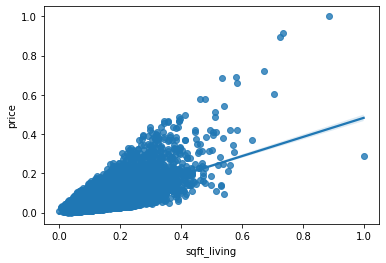

In [ ]:
sns.regplot(x="sqft_living", y="price",data=df)



*  The above graph plot the linear relationship between sqft_living and Price with with a translucent 95% confidence interval band

*   The confidence interval (CI) is a range of values that's likely to include a population value with a certain degree of confidence, it can also be set to None 
*  It is observed that it is positively correlated




## **6. Feature Selection using Ordinary Least Squares**

In [ ]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(df['price'], df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
        'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long',
        'sqft_living15','sqft_lot15']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              9237.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:27:44   Log-Likelihood:                          46807.
No. Observations:               21613   AIC:                                 -9.358e+04
Df Residuals:                   21597   BIC:                                 -9.345e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.2861      0.008    -35.967      0.000      -0.302      -0.271
bathrooms         0.0467      0.004     13.008      0.000       0.040       0.054
sqft_living       0.1533      0.002     71.891      0.000       0.149       0.157
sqft_lot          0.0230      0.011      2.109      0.035       0.002       0.044
floors            0.0059      0.001      4.808      0.000       0.003       0.008
waterfront        0.0740      0.002     30.911      0.000       0.069       0.079
view              0.0269      0.001     22.912      0.000       0.025       0.029
condition        -0.0096      0.001     -8.411      0.000      -0.012      -0.007
grade             0.0556      0.003     20.475      0.000       0.050       0.061
sqft_above        0.1853      0.003     64.654      0.000       0.180       0.191
sqft_basement     0.0706      0.002     29.254      0.000       0.066       0.075
yr_built         -0.0452      0.001    -40.115      0.000      -0.047      -0.043
yr_renovated   2.233e-06      0.001      0.002      0.998      -0.002       0.002
lat               0.0353      0.001     40.865      0.000       0.034       0.037
long             -0.0338      0.002    -17.402      0.000      -0.038      -0.030
sqft_living15     0.0327      0.003     11.949      0.000       0.027       0.038
sqft_lot15       -0.0538      0.009     -6.119      0.000      -0.071      -0.037
==============================================================================
Omnibus:                    16898.037   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1184485.472
Skew:                           3.220   Prob(JB):                         0.00
Kurtosis:                      38.691   Cond. No.                     6.97e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


*    In the above code using OLS we find the p-values of every column and determine which features are significant
*   The features which have a p-value greater than 0.05 have less significance as it denotes that more than 5% of the values are randomly selected
*   In the output above we can see that the column 'yr_renovated' has a p-value of 0.998, that means it is not statistically significant and it fails to reject the null hypothesis
*   Null hypothesis is claiming that there is no relationship between two measured events when a particular set of data is selected randomly
*   The other colum


**OLS after removing insignificant feature 'yr_renovated'**

In [ ]:
import statsmodels.api as sm

model = sm.OLS(df['price'], df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
        'view','condition','grade','sqft_above','sqft_basement','yr_built','lat','long',
        'sqft_living15','sqft_lot15']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              9853.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:27:44   Log-Likelihood:                          46807.
No. Observations:               21613   AIC:                                 -9.358e+04
Df Residuals:                   21598   BIC:                                 -9.346e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.2861      0.008    -35.974      0.000      -0.302      -0.271
bathrooms         0.0467      0.004     13.123      0.000       0.040       0.054
sqft_living       0.1533      0.002     72.007      0.000       0.149       0.157
sqft_lot          0.0230      0.011      2.110      0.035       0.002       0.044
floors            0.0059      0.001      4.811      0.000       0.003       0.008
waterfront        0.0740      0.002     30.970      0.000       0.069       0.079
view              0.0269      0.001     22.920      0.000       0.025       0.029
condition        -0.0096      0.001     -8.477      0.000      -0.012      -0.007
grade             0.0556      0.003     20.743      0.000       0.050       0.061
sqft_above        0.1853      0.003     64.750      0.000       0.180       0.191
sqft_basement     0.0706      0.002     29.258      0.000       0.066       0.075
yr_built         -0.0452      0.001    -42.101      0.000      -0.047      -0.043
lat               0.0353      0.001     40.868      0.000       0.034       0.037
long             -0.0338      0.002    -17.458      0.000      -0.038      -0.030
sqft_living15     0.0327      0.003     11.975      0.000       0.027       0.038
sqft_lot15       -0.0538      0.009     -6.120      0.000      -0.071      -0.037
==============================================================================
Omnibus:                    16898.047   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1184487.725
Skew:                           3.220   Prob(JB):                         0.00
Kurtosis:                      38.691   Cond. No.                     1.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After considering the P-values of every feature which are less than 0.05, we now have a set of features which are significant to predict the target variable

## **7. Splitting the columns into Target and Predictor variables**

In [ ]:
y=df[['price']]
X=df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition'
        ,'grade','sqft_above','sqft_basement','yr_built','lat','long',
      'sqft_living15','sqft_lot15']]

After the most important features that are significant to determine the prediction of the target variable, the columns are split into dependent and independent variable.


*   Here the variable price is the Target variable
*   The significant variables which were found using OLS feature selection, become the independent variables



**7.1 Determining the distributions of the Dependent variables**

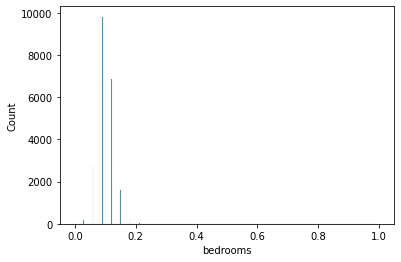

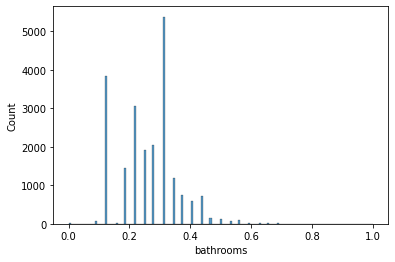

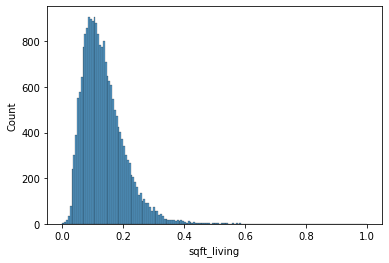

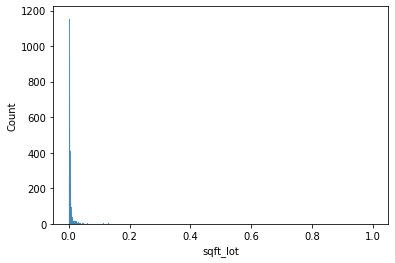

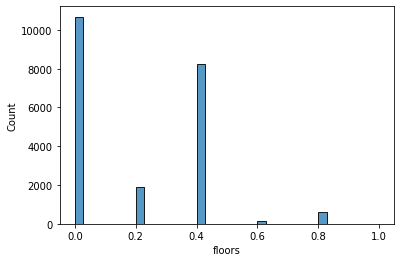

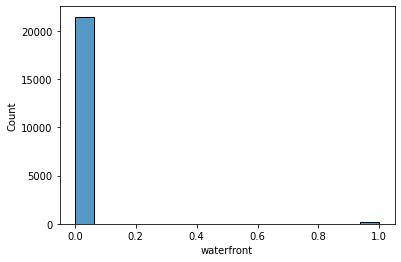

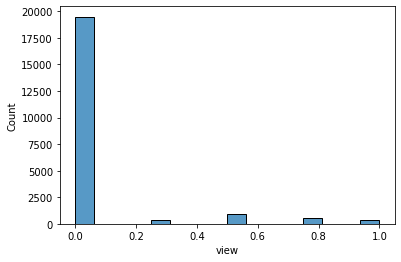

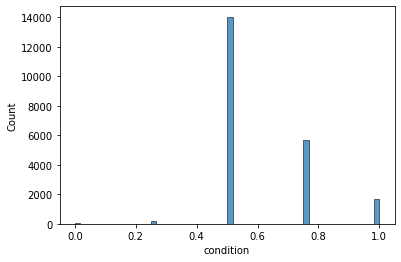

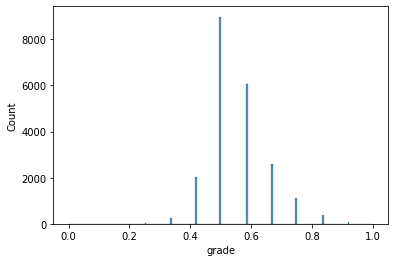

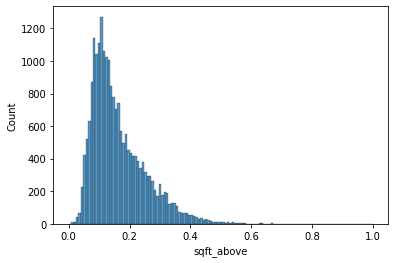

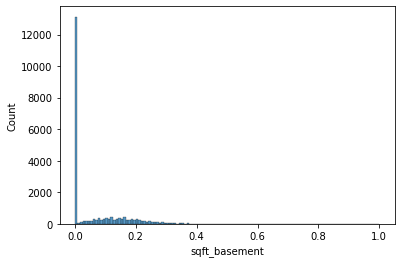

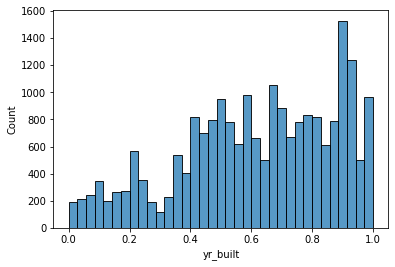

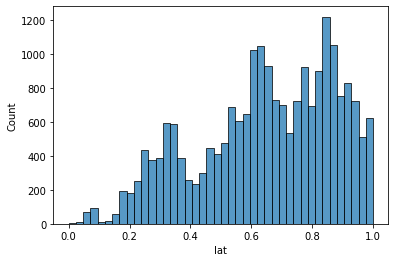

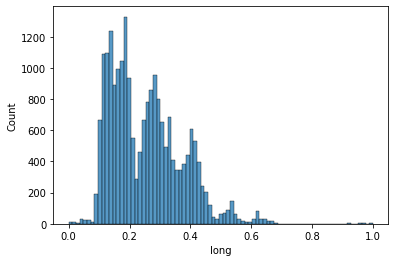

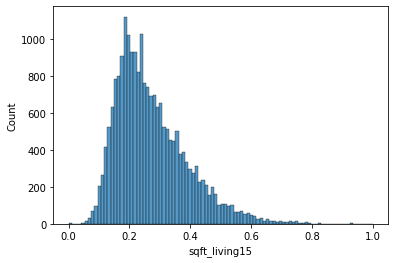

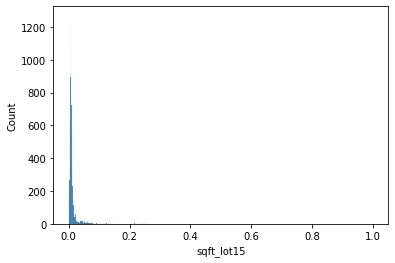

In [ ]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.histplot(X[col])

The above code is to find the distributions of the dependent variables.



*   The distributions of columns sqft_living, sqft_above and sqft_living15 are right skewed as the mean comes towards the right of the median and it has a long tail towards the right because of the outliers
*   The columns long, lat and yr_built have multi modal distributions as they have more than two curves in the distributions of the dataset
*   The columns floors and bathrooms have a bimodal distribution because of two bell curves
*   The categorical column waterfront shows a Bernoullis distribution as it can have only 2 values either 0 or 1

## **8. Splitting the data into Training and Testing data**

In [ ]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=2)
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(xtrain)}')
print(f'Shape of X_train: {xtrain.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(xtest)}')
print(f'Shape of X_test: {xtest.shape}')


Total # of sample in whole dataset: 21613
**************************************************
Total # of sample in train dataset: 14480
Shape of X_train: (14480, 16)
**************************************************
Total # of sample in test dataset: 7133
Shape of X_test: (7133, 16)



*   After the target and predictors variables are selected the train_test_split function is used to split the the dataset as 67% into training and 33% of the data into testing

*   The random state is to set the seed for the random generator. If its not set, everytime the train_test_split function is executed it will take a random value each time. The random state ensures that the random numbers are generated in the same order





**8.1 Check whether the Training and Testing data sets are same or not**

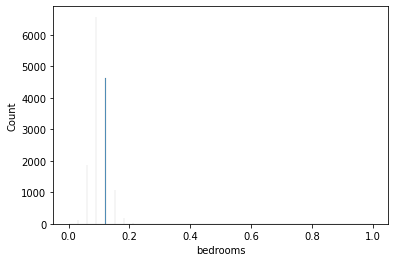

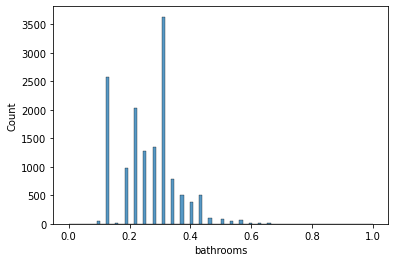

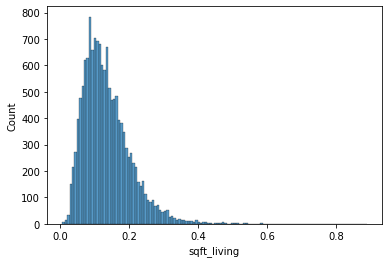

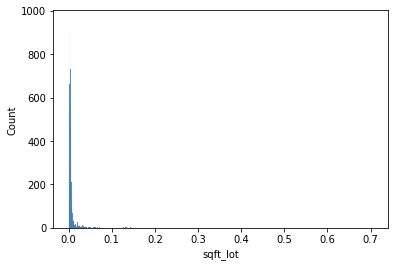

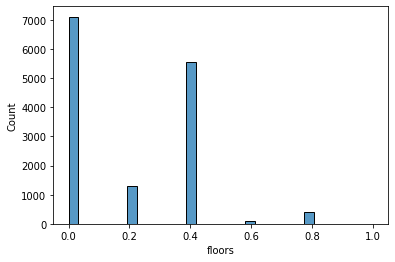

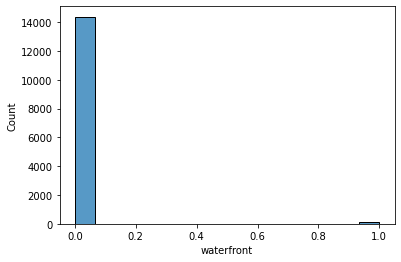

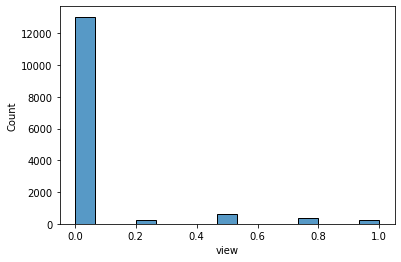

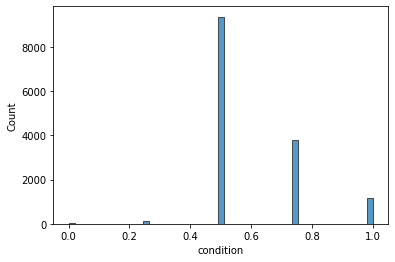

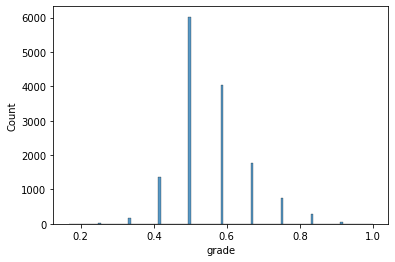

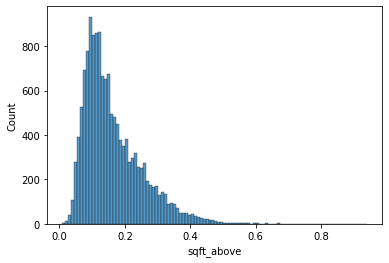

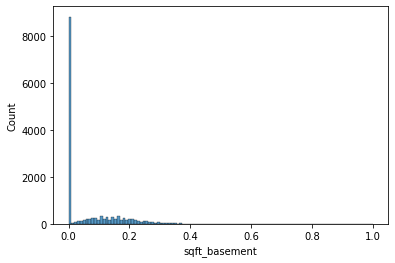

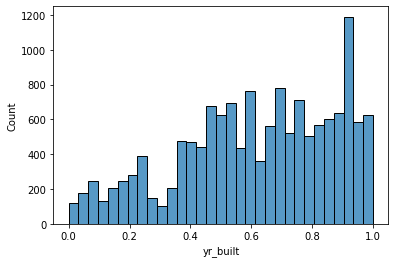

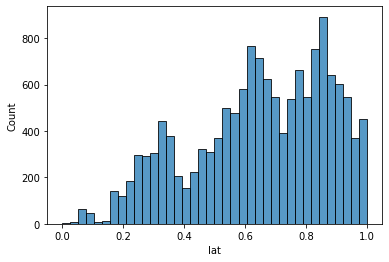

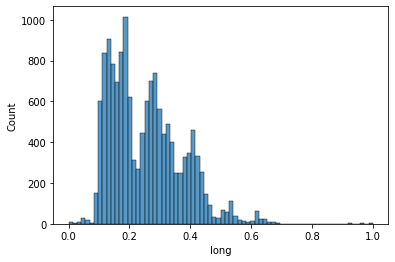

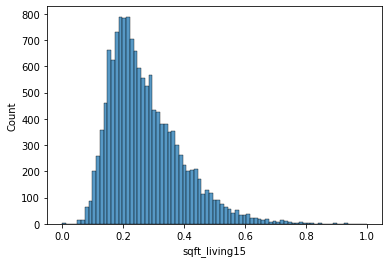

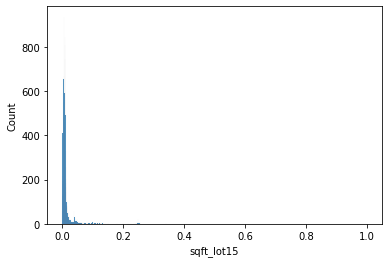

In [ ]:
#Plotting the histogram for xtrain
for i, col in enumerate(xtrain.columns):
    plt.figure(i)
    sns.histplot(xtrain[col])

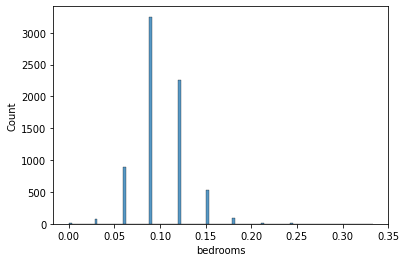

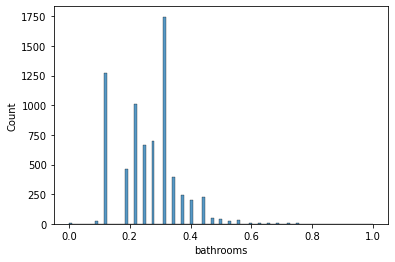

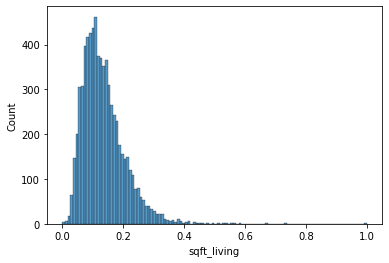

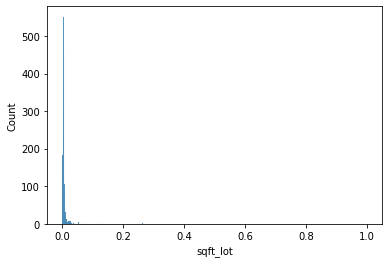

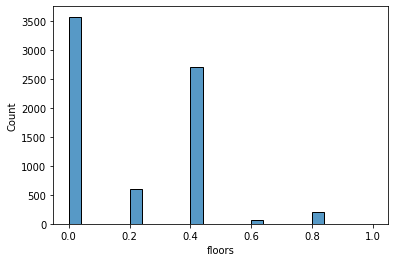

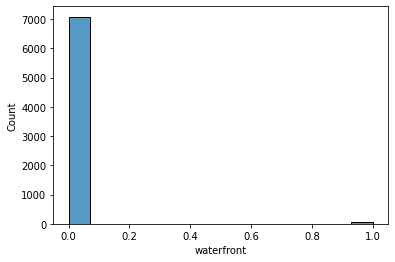

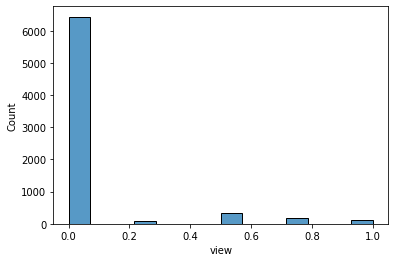

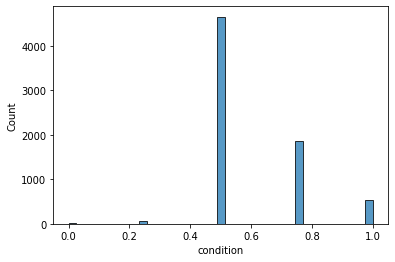

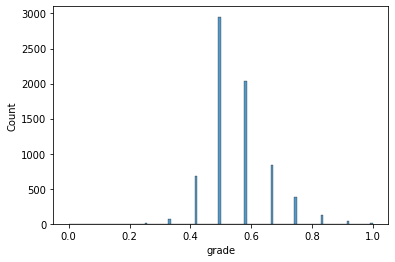

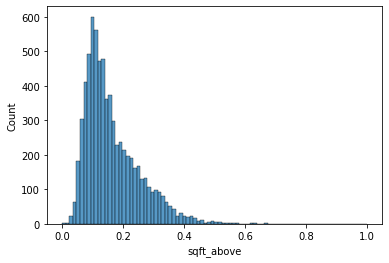

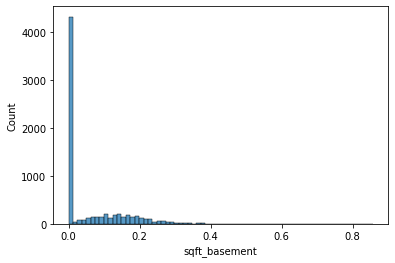

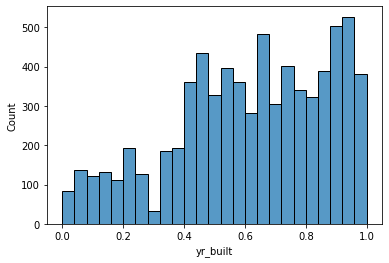

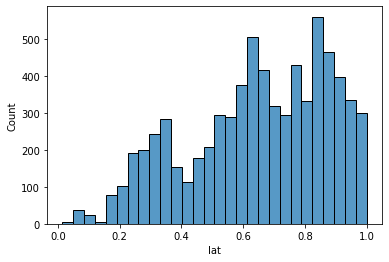

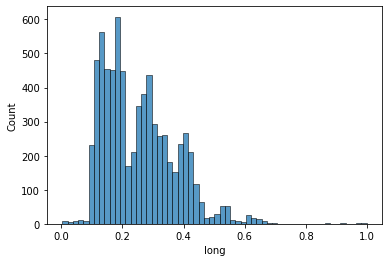

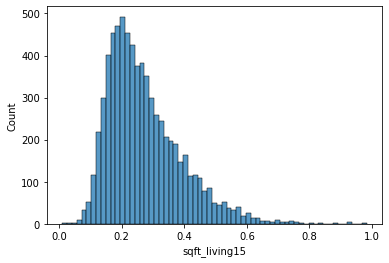

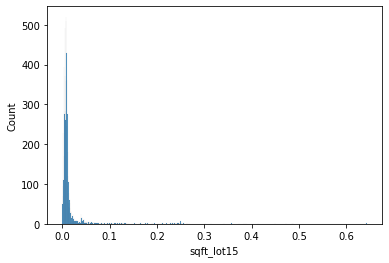

In [ ]:
#Plotting the histogram for xtest 
for i, col in enumerate(xtest):
    plt.figure(i)
    sns.histplot(xtest[col])

It is observed the that training and testing data sets of predictor variables have the same distributions but the dataset is different as the count of the values in both the datasets is different

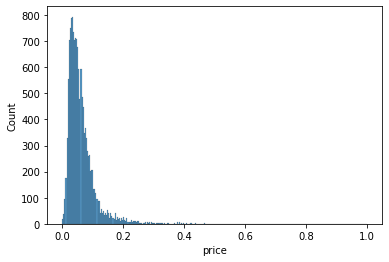

In [ ]:
#Plotting the histogram for ytrain 
for i, col in enumerate(ytrain.columns):
    plt.figure(i)
    sns.histplot(ytrain[col])

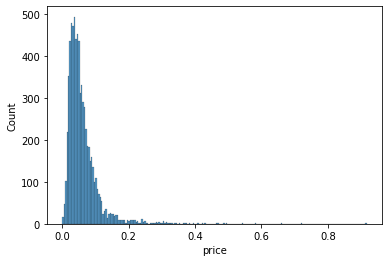

In [ ]:
#Plotting the histogram for ytest 
for i, col in enumerate(ytest):
    plt.figure(i)
    sns.histplot(ytest[col])

From the histograms, it can be inferred that the training and testing data of the target variables have the same distributions but different sets of data as the count of the values in the dataset is different.

## **Conclusion**

The House Sales in king county dataset analysed for any missing data and data was normalized. The data set was explored for relationships between the variables and the significant features were found which will be used to predict the target based on the P-values.

1. Which independent variables are useful to predict a target (dependent variable)?
 

*   bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, lat, long,sqft_living15,sqft_lot15
*   These variables had a p-value below 0.05, rejecting the null hypothesis testing

2. Which independent variables have missing data? How much? 
--> No, the data set doesnt have any missing data

3. Do the training and test sets have the same data?
--> As per the histograms observed, the training and testing data have different data as the value counts are different in the histograms, but they have the same distributions.

4. Is the predictor variables independent of all the other predictor variables?
--> There are some variables which are dependent on each other as observed in the heatmap because of the strong correlation close to 1 whereas some are independent of each other.

5. Which predictor variables are the most important?
*   According to the heatmap and OLS, the sqft_living has a correlation of 0.7 and coefficient of 0.1533
*   For sqft_above the correlation is 0.61 and coefficient is 0.1853
These 2 columns are the most important out of all the other predictor variables


6. Do the ranges of the predictor variables make sense?


*   The range of the column yr_built and lat makes sense as seen in the boxplot
*   The range of the remaining columns doesnt make sense as there are many outliers because of which it is not normally distributed
*   Many variables are right skewed like  'sqft_living', 'sqft_above' and 'long' 



7. What are the distributions of the predictor variables?  
*   The categorical columns waterfront have a Bernoullis Distribution as it can take only 2 values 0 and 1
*   The distributions of columns sqft_living, sqft_above and sqft_living15 are right skewed as the mean comes towards the right of the median and it has a long tail towards the right because of the outliers
*   The columns long, lat and yr_built have multi modal distributions as they have more than two curves in the distributions of the dataset
*   The columns floors and bathrooms have a bimodal distribution because of two bell curves



## **References**

https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

https://github.com/abhi-gm/Machine-Learning-Workshop/blob/main/1_Linear_regression.ipynb

https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/

https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

https://deepai.org/machine-learning-glossary-and-terms/null-hypothesis

https://www.kaggle.com/anima890/linear-regression-predicting-house-price

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

https://seaborn.pydata.org/generated/seaborn.boxplot.html

The Descriptive Statistics section was referred from Kaggle for the House Sales in King County data set.Data preprocessing and Data Normalization was referred from Stack overflow and Github. The Explanatory Data Analysis 
was referred from Seaborn and towardsdataScience. Feature Selection was referred from Github. 


Copyright 2021 Ankana Samanta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

